# Creating a DataPattern for the pad6 detector

This notebook shows an example of how to create a DataPattern for a measurement with the pad6 detector.



In [1]:
#import sys
#sys.path.append("/home/eric/cernbox/PyCharm/PyFDD/")
import pyfdd
print('PyFDD version', pyfdd.__version__)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

from IPython.display import display

pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', None)

PyFDD version 0.8.0


In [2]:
filename = "../test_pyfdd/data_files/pad_dp_2M.txt"

## Creating the DataPattern

The arguments to create a data pattern are the path to the data matrix, the number of chips (2 for the time quad 1 for the others) and the real size of the central pixels.

Two DataPattern can be added together.

In [3]:
dp1 = pyfdd.DataPattern(file_path=filename)
dp2 = dp1*1.5
dp = dp1 + dp2

## Manipulation of the data pattern

In [4]:
# Manipulation methods

# Manipulation methods
# -Orient
dp.manip_orient('cw')  # PAD6 orientation
# use 'cw','cc','mh',mv' for rotate clockwise, rotate counterclockwise, mirror horizontal and mirror vertical
# in the desired order

# Mask
mask = np.zeros([22,22])
mask[1,1] =\
mask[7,19]  = mask[8,18]  = mask[8,19] = mask[8,20] = mask[9,18] = mask[9,19]  = mask[9,20]   = mask[10,1] = \
mask[10,10] = mask[10,19] = mask[11,1] = mask[11,2] = mask[11,9] = mask[11,10] = mask[11,11]  = mask[12,1] = \
mask[12,10] = mask[19,1]  = mask[20,1] = 1
dp.set_mask(mask)

# -Angular calibration
dp.manip_create_mesh(pixel_size=1.3, distance=315)

# -Remove edge pixels
dp.remove_edge_pixel(1)



## Set the angular orientation for the pattern

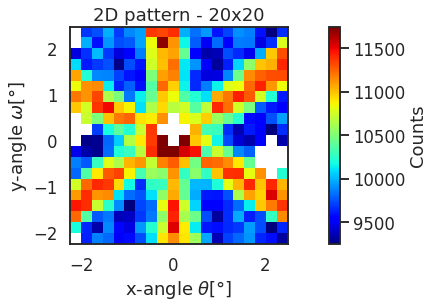

In [5]:
%matplotlib inline
fg = plt.figure()
ax = fg.add_subplot(1,1,1)
dp_plotter = dp.draw(ax, percentiles=(0.01, 0.99), plot_type='pixels')
#dp_plotter.get_angle_tool()  # use with %matplotlib notebook

In [6]:
print('angle widget, center ', dp.center, ', angle ', dp.angle)
# set_fit_region uses the angular values from the orientation 
# but these can also be set in the function input
dp.set_fit_region(distance=2.8)

angle widget, center  (0, 0) , angle  0


## Save as json file

In [7]:
dp.io_save_json('pad_datapattern.json')